## Summary Statistics

------

In [52]:
# Import the libraries
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Import the original data files
df = pd.read_csv('../data/2017_diabetes_cleaned.csv')

--------

#### General Condition

In [54]:
df

,diabete,bmi,physhlth,menthlth,michd,hchol,hblpr,vpa,hvdr,smok,incom50,cllgr,sex,age65
0,1,26.96,0.0,0.0,0,1,1,180.0,0,0,0,1,1,1
1,0,29.43,0.0,0.0,0,0,1,0.0,0,0,1,1,0,1
2,0,27.34,6.0,0.0,1,0,1,60.0,0,1,0,0,0,1
3,0,27.12,2.0,1.0,0,0,1,0.0,0,0,0,0,0,0
4,1,23.03,5.0,0.0,0,1,1,125.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211505,1,32.45,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1
211506,0,24.80,0.0,0.0,0,0,0,0.0,0,0,1,0,1,0
211507,0,25.77,0.0,0.0,0,0,0,90.0,0,0,1,1,0,0
211508,0,22.86,0.0,0.0,0,0,0,0.0,0,0,0,1,1,0


##### After variable selection and data cleaning, we have got 211510 complete and clean samples in the dataset, with 18 variables.

--------

#### Check the Basic Statistics for 18 Selected Variables 

In [55]:
# The dependent variable, diabete, categorical
df['diabete'].describe()

count    211510.000000
mean          0.140873
std           0.347891
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabete, dtype: float64

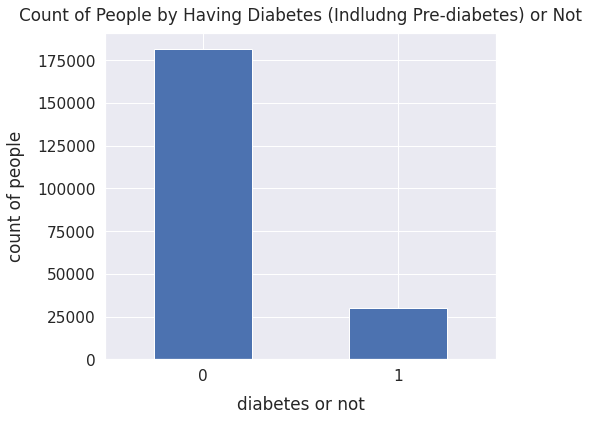

In [56]:
# the distribution of diabete
sns.set(font_scale=1.4)
df['diabete'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("diabetes or not", labelpad=12)
plt.ylabel("count of people", labelpad=12)
plt.title("Count of People by Having Diabetes (Indludng Pre-diabetes) or Not", y=1.02);

In [57]:
# The independent variable, bmi, numerical
df['bmi'].describe()

count    211510.000000
mean         27.898139
std           5.804797
min          12.010000
25%          23.960000
50%          26.970000
75%          30.800000
max          96.610000
Name: bmi, dtype: float64

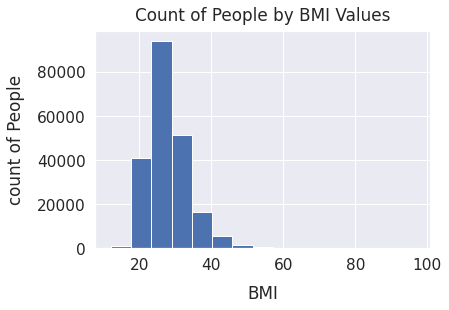

In [58]:
# the distribution of bmi
plt.hist(df['bmi'], bins=15)
plt.xlabel("BMI", labelpad=12)
plt.ylabel("count of People", labelpad=12)
plt.title("Count of People by BMI Values", y=1.02);
plt.show()

In [59]:
# The independent variable, physhlth, numerical
df['physhlth'].describe()

count    211510.000000
mean          3.268824
std           7.486178
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: physhlth, dtype: float64

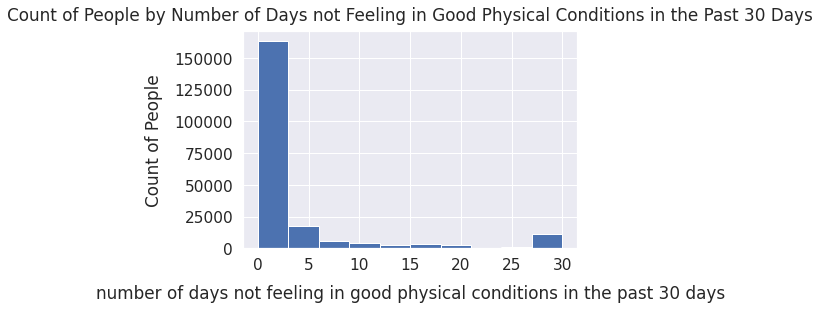

In [60]:
# the distribution of physhlth
plt.hist(df['physhlth'], bins=10)
plt.xlabel("number of days not feeling in good physical conditions in the past 30 days", labelpad=12)
plt.ylabel("Count of People", labelpad=12)
plt.title("Count of People by Number of Days not Feeling in Good Physical Conditions in the Past 30 Days", y=1.02);
plt.show()

In [61]:
# The independent variable, menthlth, numerical
df['menthlth'].describe()

count    211510.000000
mean          2.929611
std           6.934061
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: menthlth, dtype: float64

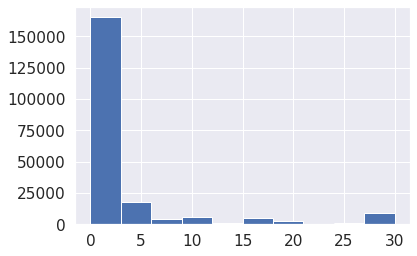

In [62]:
# the distribution of menthlth
plt.hist(df['menthlth'], bins=10)
plt.show()

In [63]:
# The independent variable, michd, categorical
df['michd'].describe()

count    211510.000000
mean          0.077850
std           0.267936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: michd, dtype: float64

<AxesSubplot:>

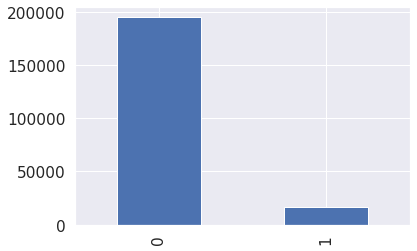

In [64]:
# the distribution of michd
df['michd'].value_counts().plot(kind='bar')

In [65]:
# The independent variable, hchol, categorical
df['hchol'].describe()

count    211510.000000
mean          0.373864
std           0.483829
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: hchol, dtype: float64

<AxesSubplot:>

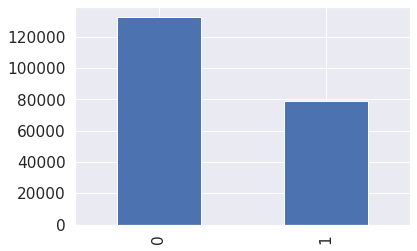

In [66]:
# the distribution of hchol
df['hchol'].value_counts().plot(kind='bar')

In [67]:
# The independent variable, hblpr, categorical
df['hblpr'].describe()

count    211510.000000
mean          0.388535
std           0.487418
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: hblpr, dtype: float64

<AxesSubplot:>

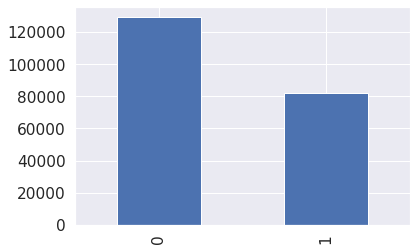

In [68]:
# the distribution of hblpr
df['hblpr'].value_counts().plot(kind='bar')

In [69]:
# The independent variable, vpa, numerical
df['vpa'].describe()

count    211510.00000
mean        136.26750
std         350.91621
min           0.00000
25%           0.00000
50%           0.00000
75%         150.00000
max       37500.00000
Name: vpa, dtype: float64

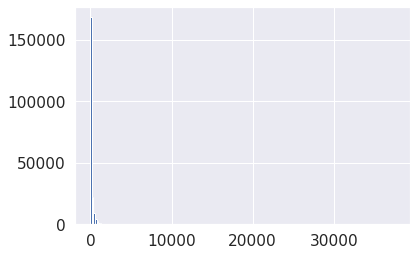

In [70]:
# the distribution of vpa
plt.hist(df[df["vpa"] <= .15e7]["vpa"], bins =200)
plt.show()

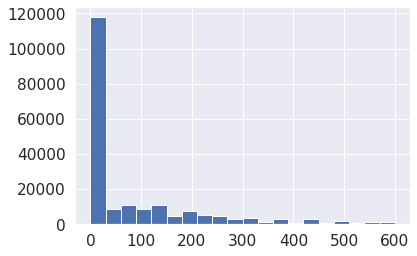

In [71]:
# Since the simple histogtam could not show the distribution of vpa clearly,
# we perform the histogram for data up to 95th quantile of vpa reported 
vpa_quant_95 = df['vpa'].quantile(.95)
plt.hist(df[df['vpa'] <= vpa_quant_95]['vpa'], bins=20)
plt.show()

In [72]:
# The independent variable, hvdr, categorical
df['hvdr'].describe()

count    211510.000000
mean          0.062905
std           0.242792
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hvdr, dtype: float64

<AxesSubplot:>

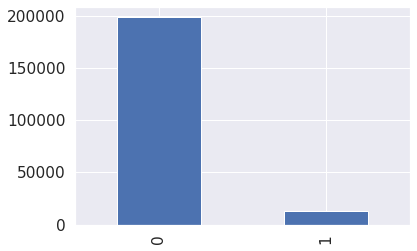

In [73]:
# the distribution of hvdr
df['hvdr'].value_counts().plot(kind='bar')

In [74]:
# The independent variable, smok, categorical
df['smok'].describe()

count    211510.000000
mean          0.118514
std           0.323217
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: smok, dtype: float64

<AxesSubplot:>

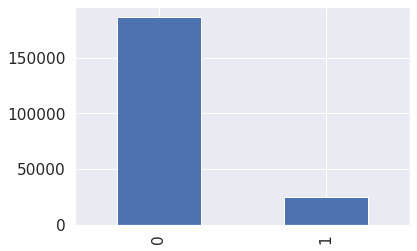

In [75]:
# the distribution of smok
df['smok'].value_counts().plot(kind='bar')

In [76]:
# The independent variable, incom50, categorical
df['incom50'].describe()

count    211510.000000
mean          0.570758
std           0.494969
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: incom50, dtype: float64

<AxesSubplot:>

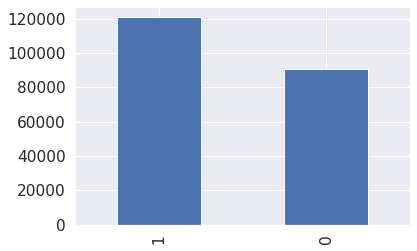

In [77]:
# the distribution of incom50
df['incom50'].value_counts().plot(kind='bar')

In [78]:
# The independent variable, cllgr, categorical
df['cllgr'].describe()

count    211510.000000
mean          0.469765
std           0.499086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: cllgr, dtype: float64

<AxesSubplot:>

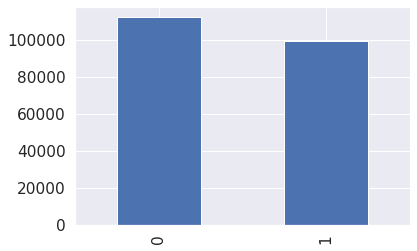

In [79]:
# the distribution of cllgr
df['cllgr'].value_counts().plot(kind='bar')

In [80]:
# The independent variable, sex, categorical
df['sex'].describe()

count    211510.000000
mean          0.529672
std           0.499120
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sex, dtype: float64

<AxesSubplot:>

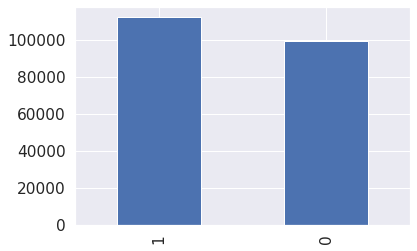

In [81]:
# the distribution of sex
df['sex'].value_counts().plot(kind='bar')

In [82]:
# The independent variable, age65, categorical
df['age65'].describe()

count    211510.000000
mean          0.340887
std           0.474009
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: age65, dtype: float64

<AxesSubplot:>

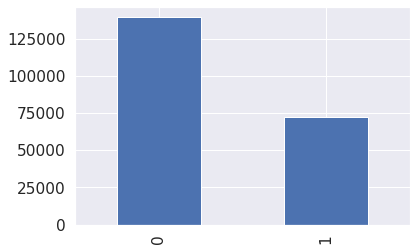

In [83]:
# the distribution of age65
df['age65'].value_counts().plot(kind='bar')

------------------

#### Remove Outliers and Invalid Values

In [89]:
# Independent variable vpa represnts Minutes of total Vigorous Physical Activity per week
# The unit is minutes/week
# A value which is > 8hr * 7days * 60 minutes = 3360 minutes/week seems unreasonable or invalid
df=df[df['vpa'] <= 3360]
df['vpa'].describe()

count    211319.000000
mean        131.509618
std         282.643968
min           0.000000
25%           0.000000
50%           0.000000
75%         150.000000
max        3360.000000
Name: vpa, dtype: float64

In [90]:
df

,diabete,bmi,physhlth,menthlth,michd,hchol,hblpr,vpa,hvdr,smok,incom50,cllgr,sex,age65
0,1,26.96,0.0,0.0,0,1,1,180.0,0,0,0,1,1,1
1,0,29.43,0.0,0.0,0,0,1,0.0,0,0,1,1,0,1
2,0,27.34,6.0,0.0,1,0,1,60.0,0,1,0,0,0,1
3,0,27.12,2.0,1.0,0,0,1,0.0,0,0,0,0,0,0
4,1,23.03,5.0,0.0,0,1,1,125.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211505,1,32.45,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1
211506,0,24.80,0.0,0.0,0,0,0,0.0,0,0,1,0,1,0
211507,0,25.77,0.0,0.0,0,0,0,90.0,0,0,1,1,0,0
211508,0,22.86,0.0,0.0,0,0,0,0.0,0,0,0,1,1,0


##### After excluding potential invalid values, we have got 211319 complete and clean samples in the dataset, with 18 variables.

In [91]:
## save to CSV
df.to_csv('../data/2017_diabetes_cleaned_vld.csv', index = False)

-----------------

In [ ]:
#### Re-run the Plots